<a href="https://colab.research.google.com/github/sirilalithaadapa/RICELEAFDISEASERECOGNITION/blob/main/RICELEAFDISEASERECOGNITIONUSINGCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip uninstall tensorflow keras -y


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Successfully uninstalled keras-2.15.0


In [3]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
ERROR: pip's dependency resolver doe

In [2]:
# Import necessary libraries
from __future__ import absolute_import, print_function, division, unicode_literals


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

# Mounting Google Drive
from google.colab import drive, files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [4]:
data_dir ="/content/drive/MyDrive/rice-leaf/rice"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [5]:
train_path = '/content/drive/MyDrive/rice-leaf/rice/train'
test_path = '/content/drive/MyDrive/rice-leaf/rice/validation'

In [6]:

# Image Data Generator for training data with augmentations
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

# Flow training images in batches
train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')

Found 157 images belonging to 3 classes.


In [7]:
# Image Data Generator for validation data without augmentations
img_val_gen = ImageDataGenerator(rescale=1./255)

In [8]:
# Flow validation images in batches
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode='sparse')


Found 84 images belonging to 3 classes.


In [9]:
# Model 1: Simple CNN
simple_model = Sequential([
    Conv2D(16, (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_data_gen.class_indices), activation='softmax')
])

simple_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Summary of the simple model
simple_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      22,151,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,176,803 (84.60 MB)

 Trainable params: 22,176,803 (84.60 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Model 2: Complex CNN
complex_model = Sequential([
    Conv2D(32, (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data_gen.class_indices), activation='softmax')
])

complex_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Summary of the complex model
complex_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,397,635 (169.36 MB)

 Trainable params: 44,397,635 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Training the models
EPOCHS = 70

In [14]:
simple_history = simple_model.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)
complex_history = complex_model.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.4488 - loss: 1.8371 - val_accuracy: 0.4762 - val_loss: 1.0452
Epoch 2/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7710 - loss: 0.5516 - val_accuracy: 0.5833 - val_loss: 1.9034
Epoch 3/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7819 - loss: 0.4762 - val_accuracy: 0.3690 - val_loss: 2.1786
Epoch 4/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 950ms/step - accuracy: 0.8026 - loss: 0.5171 - val_accuracy: 0.4167 - val_loss: 1.8219
Epoch 5/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8327 - loss: 0.3297 - val_accuracy: 0.5595 - val_loss: 3.7198
Epoch 6/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8060 - loss: 0.5203 - val_accuracy: 0.4405 - val_loss: 2.8570
Epoch 7/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 951ms/step - accuracy: 0.8413 - loss: 0.2952 - val_accuracy: 0.5357 - val_loss: 3.5118
Epoch 8/70
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 946ms/step - accuracy: 0.8177 - loss: 0.3402 - val_accuracy: 0.4643 - val_loss: 3

In [15]:
# Plotting the training history
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(EPOCHS)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{title} - Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{title} - Training and Validation Loss')
    plt.show()

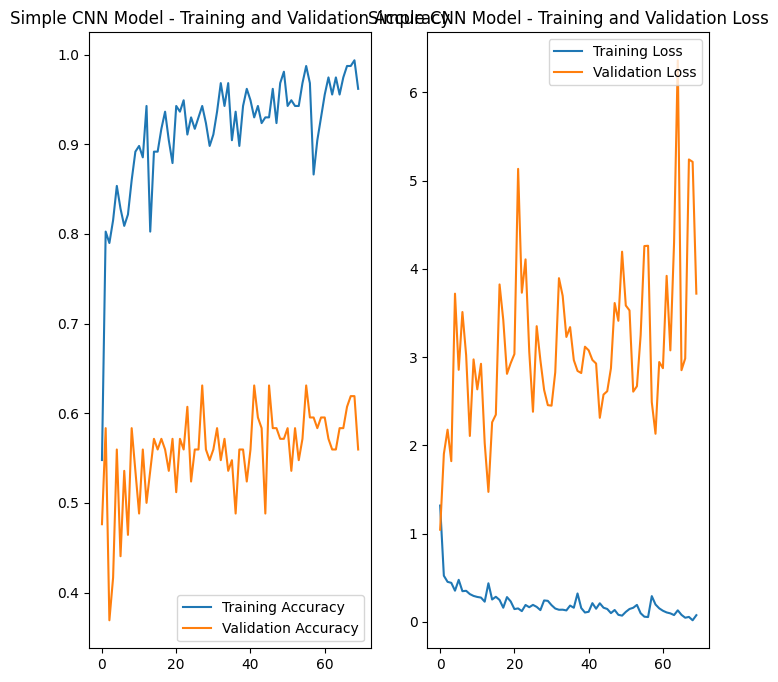

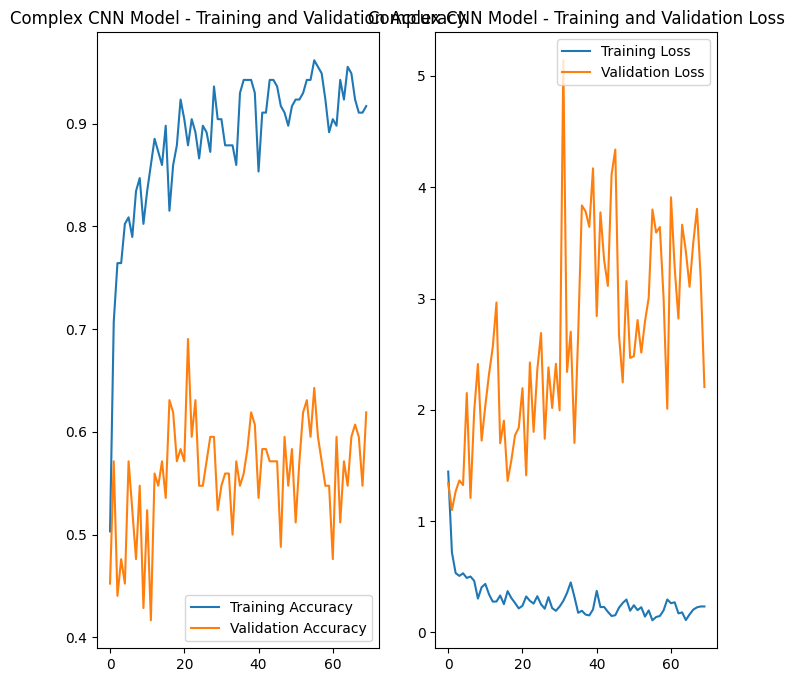

In [16]:
# Plot history for simple model
plot_history(simple_history, 'Simple CNN Model')

# Plot history for complex model
plot_history(complex_history, 'Complex CNN Model')


In [17]:

# Compare the models
def compare_histories(history1, history2, label1, label2):
    epochs_range = range(EPOCHS)

    acc1 = history1.history['accuracy']
    val_acc1 = history1.history['val_accuracy']
    loss1 = history1.history['loss']
    val_loss1 = history1.history['val_loss']

    acc2 = history2.history['accuracy']
    val_acc2 = history2.history['val_accuracy']
    loss2 = history2.history['loss']
    val_loss2 = history2.history['val_loss']

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc1, label=label1)
    plt.plot(epochs_range, acc2, label=label2)
    plt.legend(loc='lower right')
    plt.title('Training Accuracy Comparison')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, val_acc1, label=label1)
    plt.plot(epochs_range, val_acc2, label=label2)
    plt.legend(loc='lower right')
    plt.title('Validation Accuracy Comparison')

    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, loss1, label=label1)
    plt.plot(epochs_range, loss2, label=label2)
    plt.legend(loc='upper right')
    plt.title('Training Loss Comparison')

    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, val_loss1, label=label1)
    plt.plot(epochs_range, val_loss2, label=label2)
    plt.legend(loc='upper right')
    plt.title('Validation Loss Comparison')

    plt.tight_layout()
    plt.show()

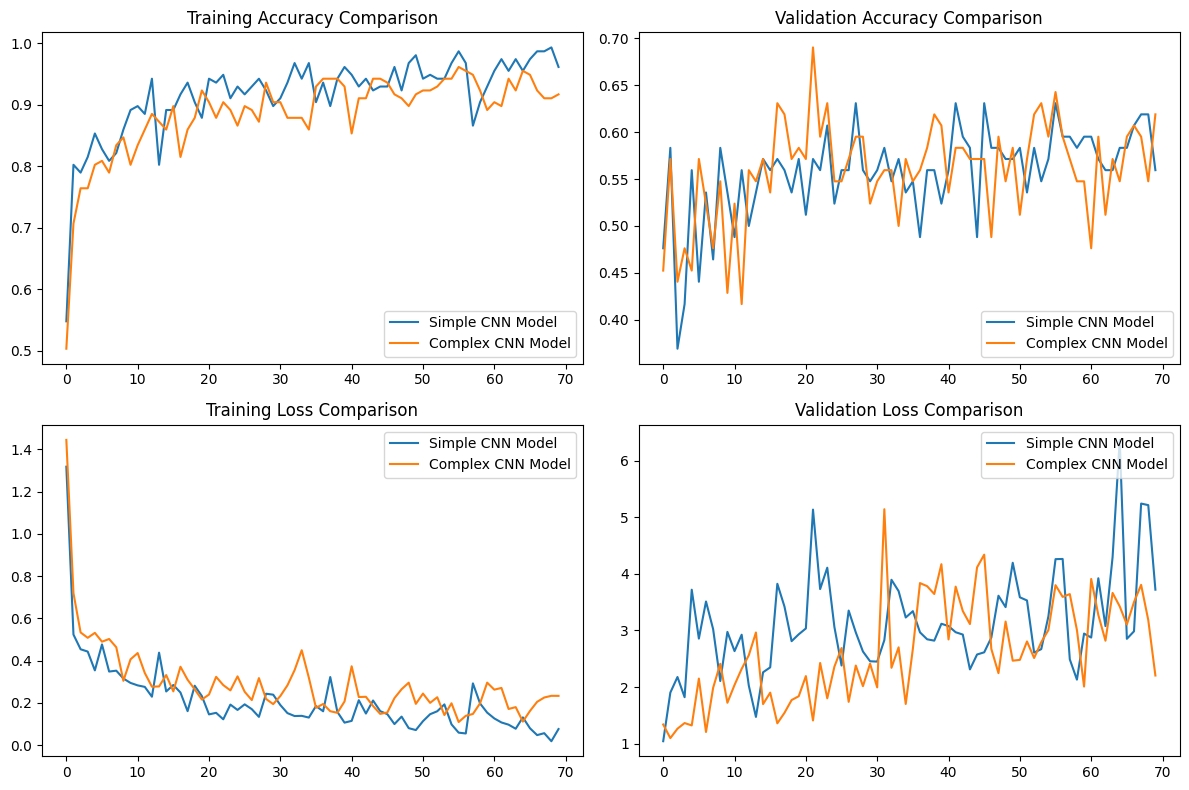

In [18]:
# Compare both models
compare_histories(simple_history, complex_history, 'Simple CNN Model', 'Complex CNN Model')
